In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [1]:
import pandas as pd
filepath=pd.read_csv('energysource.csv')
tot_renewable_energy=[filepath['Other renewables excluding bioenergy'][i]
                      +filepath['Electricity from bioenergy'][i]
                      +filepath['Electricity from solar'][i]
                      +filepath['Electricity from wind'][i]
                      +filepath['Electricity from hydro'][i]
                      +filepath['Electricity from nuclear'][i] for i in range(len(filepath['Electricity from nuclear']))]
tot_nonrenewable_energy=[filepath['Electricity from oil'][i]
                      +filepath['Electricity from gas'][i]
                      +filepath['Electricity from coal'][i]  for i in range(len(filepath['Electricity from nuclear']))]

total_energy=[tot_renewable_energy[i]+tot_nonrenewable_energy[i] for i in range (len(tot_renewable_energy))]

tot=pd.DataFrame({
    'Country':filepath['Country'],
    'Year': filepath['Year'],
    'Total_Renewable_Energy':tot_renewable_energy,
    'Total_Non-renewable_Energy':tot_nonrenewable_energy,
    'Total_Energy': total_energy,
    'Percentage':[tot_renewable_energy[i]/total_energy[i] for i in range (len(total_energy))]


})
tot.to_csv('tot_energysource.csv',index='False')


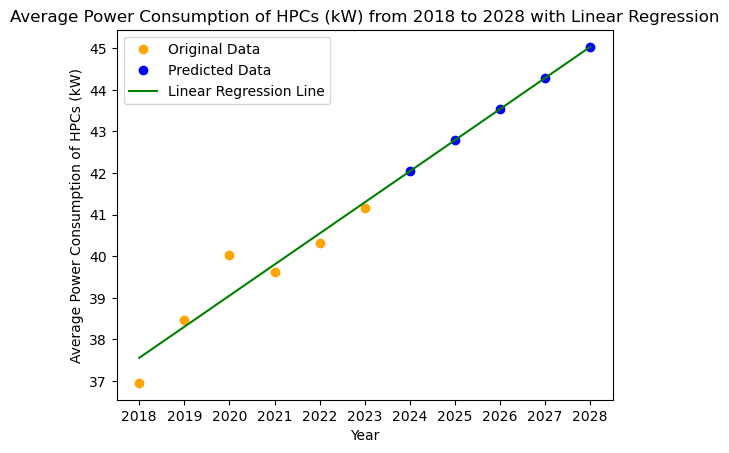

0.7475855460832197
-1471.071144047604


In [16]:
# Reload the CSV file
filepath = pd.read_csv('combined_energy_statistics_by_year.csv')

# Original years and values
years = [2018, 2019, 2020, 2021, 2022, 2023]
values = [filepath['Percentage'][i] for i in range(6)]

# Reshape years for linear regression model
years_array = np.array(years).reshape(-1, 1)
values_array = np.array(values)

# Initialize and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(years_array, values_array)

# Predict future values for 2024-2028
future_years = np.array([2024, 2025, 2026, 2027, 2028]).reshape(-1, 1)
predicted_values = linear_model.predict(future_years)

# Combine original and predicted values for plotting
extended_years = years + [2024, 2025, 2026, 2027, 2028]
extended_values = list(values) + list(predicted_values)

# Generate predictions for all years (both original and future) for the regression line
all_years = np.array(extended_years).reshape(-1, 1)
all_predicted_values = linear_model.predict(all_years)

# Plot original data, predictions, and the regression line
plt.plot(years, values, 'o', color='orange', label='Original Data')  # Original data in orange
plt.plot([2024, 2025, 2026, 2027, 2028], predicted_values, 'o', color='blue', label='Predicted Data')  # Predicted data in blue
plt.plot(extended_years, all_predicted_values, linestyle='-', color='green', label='Linear Regression Line')  # Regression line in green

# Set x-axis labels to display all years
plt.xticks(extended_years)

plt.xlabel('Year')
plt.ylabel('Average Power Consumption of HPCs (kW)')
plt.title('Average Power Consumption of HPCs (kW) from 2018 to 2028 with Linear Regression')
plt.legend()
plt.show()

slope = linear_model.coef_[0]
intercept = linear_model.intercept_
print(slope)
print(intercept)